Dataset Shape: (20, 5)

First 5 Rows:
    ID  Age  Salary  Experience  Working_Hours
0   1   25   50000           2             40
1   2   28   55000           3             42
2   3   24   52000           2             39
3   4   27   58000           3             41
4   5   45  150000          20             60

Numeric Columns: ['ID', 'Age', 'Salary', 'Experience', 'Working_Hours']

--- Data Profiling Summary ---
               count      mean           std      min       25%      50%  \
ID              20.0     10.50      5.916080      1.0      5.75     10.5   
Age             20.0     30.95      8.696491     22.0     25.00     28.0   
Salary          20.0  72450.00  40097.873680  47000.0  51750.00  55500.0   
Experience      20.0      6.35      8.014953      1.0      2.00      3.0   
Working_Hours   20.0     45.00      7.960428     37.0     40.00     42.0   

                    75%       max  missing_values  skewness  kurtosis  
ID                15.25      20.0               0  

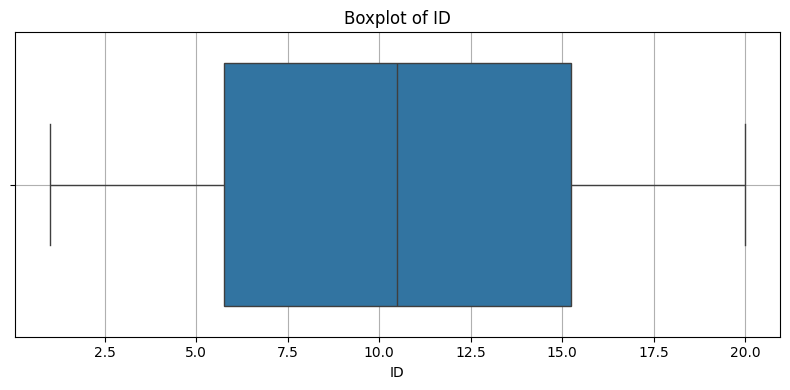

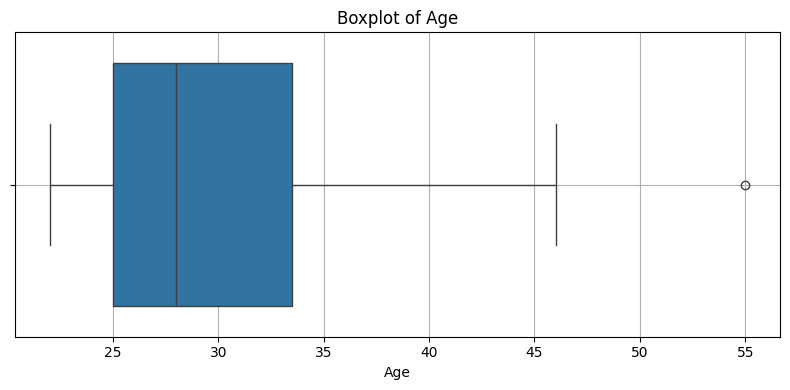

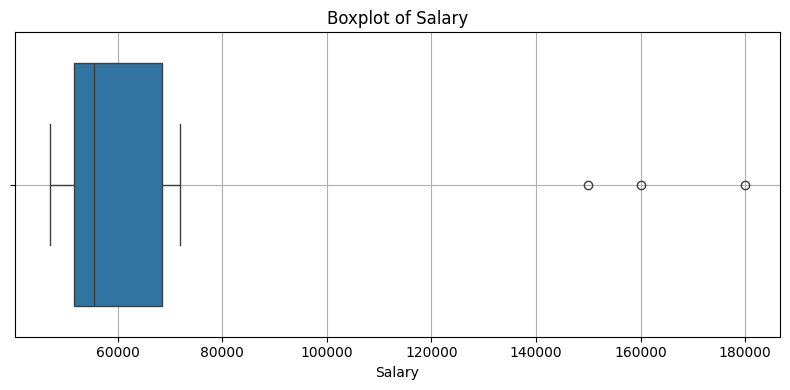

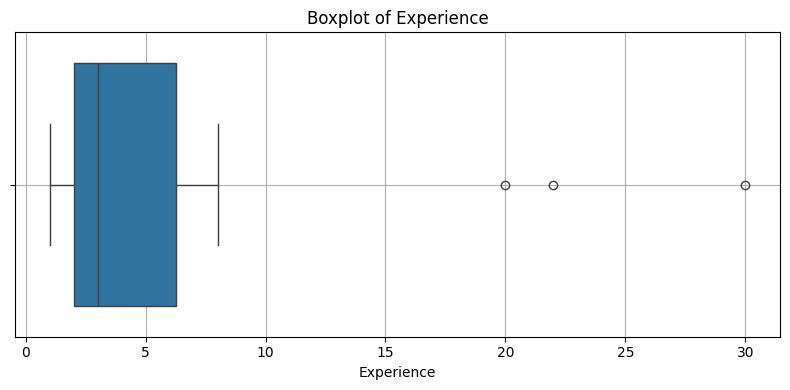

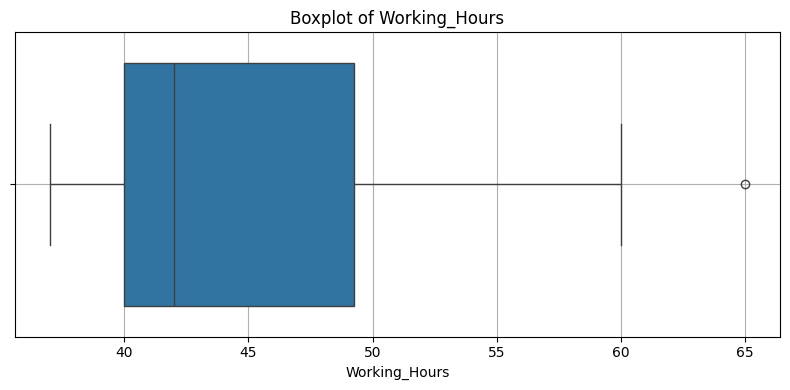


Dataset shape after removing Z-Score outliers: (19, 5)
Cleaned dataset saved as 'cleaned_dataset.csv'


In [5]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.


# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
df = pd.read_csv('employee_data.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("\nNumeric Columns:", numeric_cols.tolist())

# Step 1: Data Profiling Summary
print("\n--- Data Profiling Summary ---")
profile = df[numeric_cols].describe().T
profile['missing_values'] = df[numeric_cols].isnull().sum()
profile['skewness'] = df[numeric_cols].skew()
profile['kurtosis'] = df[numeric_cols].kurt()
print(profile)

# Step 2: Outlier Detection - IQR Method
print("\n--- Outlier Detection using IQR ---")
outliers_iqr = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_iqr[col] = outliers.shape[0]
    print(f"{col}: {outliers.shape[0]} outliers")

# Step 3: Outlier Detection - Z-Score Method
print("\n--- Outlier Detection using Z-Score ---")
z_scores = df[numeric_cols].apply(zscore)
outliers_z = (abs(z_scores) > 3).sum()
print(outliers_z)

# Step 4: Visualize Outliers using Boxplots
print("\n--- Visualizing Outliers (Boxplots) ---")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Optional - Remove Outliers (Z-Score Method)
# You can comment this section if you don't want to remove them
df_no_outliers = df[(z_scores.abs() < 3).all(axis=1)]
print("\nDataset shape after removing Z-Score outliers:", df_no_outliers.shape)

# Optional: Save the cleaned data
df_no_outliers.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")
